Association rules mining

In [16]:
library(arules)
library(arulesViz)
sm = read.transactions("https://courses.cs.ut.ee/2016/dm2016/spring/uploads/Main/supermarket.txt", sep = " ", format = "basket")
params = list(supp = 0.02, maxlen = 5)
params.fim = c(params, target = "frequent itemsets", minlen = 1)
params.rules = c(params, target = "rules", minlen = 2, conf = 0.05)


In [17]:
sm

transactions in sparse format with
 25382 transactions (rows) and
 15699 items (columns)

Apriori frequent itemsets


In [18]:
sm.apriori.fim.start = Sys.time()
sm.apriori.fim = apriori(data = sm, parameter = params.fim, control = list(verbose = F))
sm.apriori.fim.end = Sys.time()
sprintf("apriori FIM running time %f sec", sm.apriori.fim.end - sm.apriori.fim.start)
sm.apriori.fim.sorted = sort(sm.apriori.fim, decreasing = T, by = "support")
inspect(head(sm.apriori.fim.sorted, n = 7))


[1] "apriori FIM running time 0.245525 sec"

   items       support   
28 {9108}      0.21944685
27 {5330}      0.19533528
26 {11217}     0.09888898
25 {14155}     0.09427941
24 {13973}     0.07816563
21 {7893}      0.07276810
38 {5330,9108} 0.06973446


Eclat frequent itemsets


In [19]:
sm.eclat.fim.start = Sys.time()
sm.eclat.fim = eclat(data = sm, parameter = params.fim, control = list(verbose = F))
sm.eclat.fim.end = Sys.time()
sprintf("eclat FIM running time %f sec", sm.eclat.fim.end - sm.eclat.fim.start)
sm.eclat.fim.sorted = sort(sm.eclat.fim, decreasing = T, by = "support")
inspect(head(sm.eclat.fim.sorted, n = 7))

[1] "eclat FIM running time 0.218233 sec"

   items       support   
11 {9108}      0.21944685
12 {5330}      0.19533528
13 {11217}     0.09888898
14 {14155}     0.09427941
15 {13973}     0.07816563
18 {7893}      0.07276810
10 {5330,9108} 0.06973446


Apriori rules

In [20]:
sm.apriori.rules.start = Sys.time()
sm.apriori.rules = apriori(data = sm, parameter = params.rules, control = list(verbose = F))
sm.apriori.rules.end = Sys.time()
sprintf("apriori rules running time %f sec", sm.apriori.rules.end - sm.apriori.rules.start)
sprintf("total rules found: %g", length(sm.apriori.rules))
inspect(sort(sm.apriori.rules,decreasing = TRUE, by = "support")[1:10])

[1] "apriori rules running time 0.147707 sec"

[1] "total rules found: 20"

   lhs        rhs     support    confidence lift    
19 {5330}  => {9108}  0.06973446 0.3569988  1.626812
20 {9108}  => {5330}  0.06973446 0.3177738  1.626812
11 {13973} => {9108}  0.02935151 0.3755040  1.711139
12 {9108}  => {13973} 0.02935151 0.1337522  1.711139
17 {11217} => {9108}  0.02907572 0.2940239  1.339841
18 {9108}  => {11217} 0.02907572 0.1324955  1.339841
15 {11217} => {5330}  0.02718462 0.2749004  1.407326
16 {5330}  => {11217} 0.02718462 0.1391690  1.407326
13 {14155} => {9108}  0.02671184 0.2833264  1.291093
14 {9108}  => {14155} 0.02671184 0.1217235  1.291093


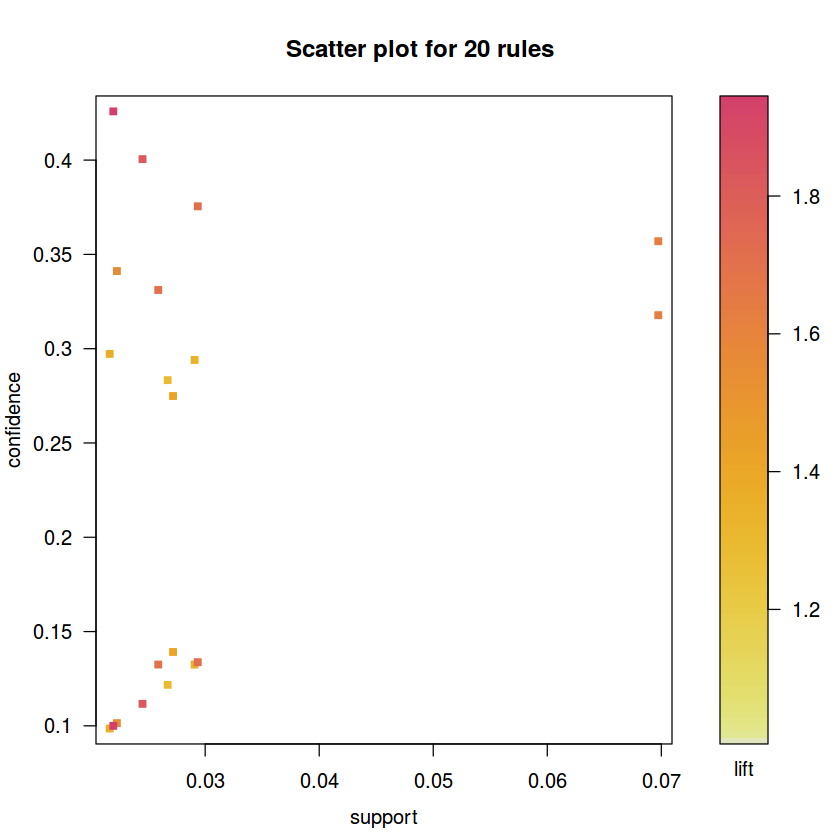

In [21]:
plot(sm.apriori.rules, measure=c("support","confidence"), shading="lift")

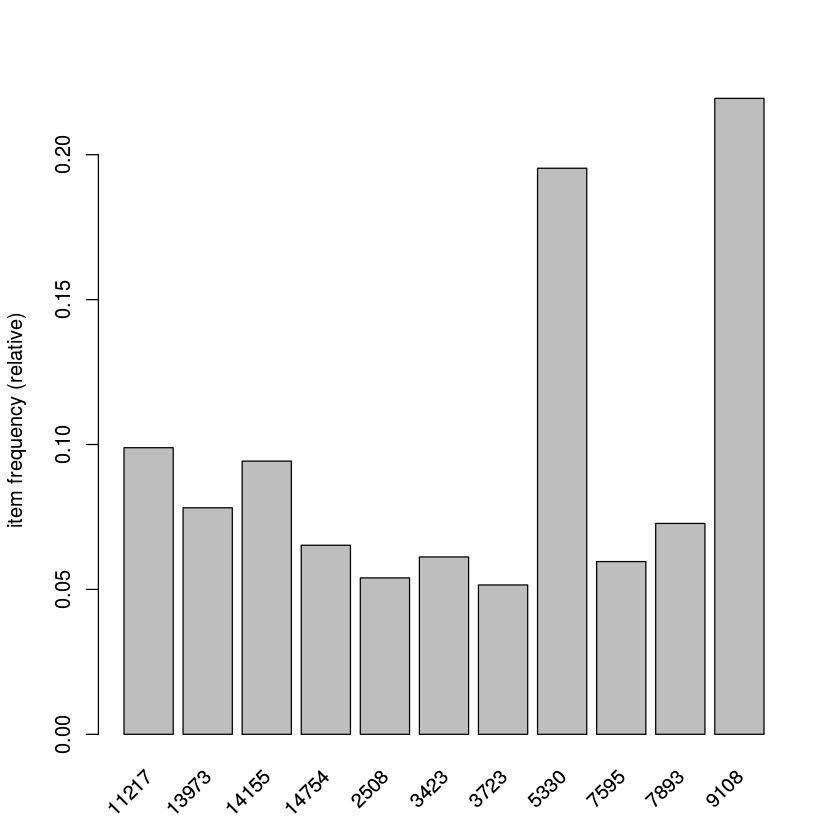

In [77]:
itemFrequencyPlot(sm, support=0.05) # most frequent itemsets



In [23]:
top.lift = sort(sm.apriori.rules, decreasing = TRUE, by = "support")
inspect(top.lift[1:5])

   lhs        rhs     support    confidence lift    
19 {5330}  => {9108}  0.06973446 0.3569988  1.626812
20 {9108}  => {5330}  0.06973446 0.3177738  1.626812
11 {13973} => {9108}  0.02935151 0.3755040  1.711139
12 {9108}  => {13973} 0.02935151 0.1337522  1.711139
17 {11217} => {9108}  0.02907572 0.2940239  1.339841


In [24]:
top.confidence = sort(sm.apriori.rules, decreasing = TRUE, by = "confidence")
inspect(top.confidence[1:5])

   lhs        rhs    support    confidence lift    
1  {3723}  => {9108} 0.02194469 0.4258410  1.940520
3  {3423}  => {9108} 0.02450556 0.4005151  1.825112
11 {13973} => {9108} 0.02935151 0.3755040  1.711139
19 {5330}  => {9108} 0.06973446 0.3569988  1.626812
7  {14754} => {9108} 0.02225987 0.3411836  1.554744


In [25]:
top.lift = sort(sm.apriori.rules, decreasing = TRUE, by = "lift")
inspect(top.lift[1:5])

   lhs        rhs    support    confidence lift    
1  {3723}  => {9108} 0.02194469 0.4258410  1.940520
2  {9108}  => {3723} 0.02194469 0.1000000  1.940520
4  {9108}  => {3423} 0.02450556 0.1116697  1.825112
3  {3423}  => {9108} 0.02450556 0.4005151  1.825112
11 {13973} => {9108} 0.02935151 0.3755040  1.711139


In [51]:
sm.listed = LIST(sm)
head(sm.listed)

[[1]]
 [1] "11116" "11572" "11995" "13868" "14076" "3896"  "5330"  "6227"  "7309" 
[10] "7893"  "7896" 

[[2]]
 [1] "1199"  "15212" "15402" "233"   "2361"  "4449"  "5330"  "750"   "764"  
[10] "9108"  "9713" 

[[3]]
[1] "13951" "5066" 

[[4]]
 [1] "10204" "10920" "12189" "1230"  "12554" "15049" "1538"  "6480"  "7595" 
[10] "8325" 

[[5]]
[1] "10551" "11300" "11699" "15427" "1915"  "5330" 

[[6]]
 [1] "10482" "10625" "11217" "11545" "12030" "13973" "14155" "15589" "2842" 
[10] "4350"  "4503"  "5641"  "6096"  "9108"  "9956"

In [74]:
n=nrow(sm)
drawContingencyTable <- function(lhs, rhs){
    f00 = 0
    f01 = 0
    f10 = 0
    f11 = 0

    for (row in sm.listed){
    if ((lhs %in% row) && (rhs %in% row)) f00=f00+1
    if ((lhs %in% row) && !(rhs %in% row)) f01=f01+1
    if (!(lhs %in% row) && (rhs %in% row)) f10=f10+1
    if (!(lhs %in% row) && !(rhs %in% row)) f11=f11+1
    }
    f1p = f11+f10
    f0p = f01+f00
    fp1 = f11+f01
    fp0 = f10+f00
    ct = matrix(c(f00, f01, f0p, f10, f11, f1p, fp0, fp1, n), nrow=3, ncol=3, byrow = TRUE)
    dimnames(ct) = list(c("A", "!A",""), c("B", "!B", ""))
    return(ct)
}



In [75]:
drawContingencyTable("9108", "5330")


,B,!B,
A,1770,3800,5570
!A,3188,16624,19812
,4958,20424,25382
